In [37]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import style
style.use('seaborn')
from tqdm import tqdm

from tsextract.feature_extraction.extract import build_features, build_features_forecast
from tsextract.domain.statistics import mean, median, std

In [38]:
df = pd.read_csv('../data/summer.csv', index_col=0, parse_dates=['time'], dayfirst=True)
df.head()

,time,price
0,2021-06-01 04:00:00+00:00,125.00
1,2021-06-01 04:15:00+00:00,125.17
2,2021-06-01 04:30:00+00:00,125.20
3,2021-06-01 04:45:00+00:00,125.30
4,2021-06-01 05:00:00+00:00,125.38


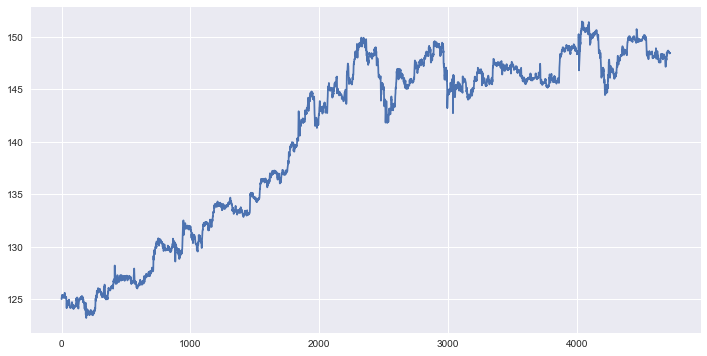

In [39]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df.index, df['price'])
plt.show()

In [40]:
test_size = 74
train = df[:-test_size]
test = df[-test_size:]
train.dtypes

time     datetime64[ns, UTC]
price                float64
dtype: object